In [91]:
# Utils to run notebook on Kaggle

%matplotlib inline
import os
import cv2
import glob
import pickle
import matplotlib
import numpy as np
import pandas as pd
import imageio as im
import seaborn as sns
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from keras import models
from pickle import dump
from pickle import load
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model, img_to_array, load_img, array_to_img
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
#from keras.preprocessing import image
import keras.utils as image

In [92]:
import sys
# load and save files with pickle
def save_pickle(file, file_name):
    dump(file, open(file_name, 'wb'))
    print('Saved: %s' % file_name)

def load_pickle(file_name):
    return load(open(file_name, 'rb'))

In [93]:
def show_image(path):
    imagen = Image.open(path)
    plt.imshow(imagen)
    plt.axis('off')
    plt.show()

In [94]:
#import csv
# Extrae las métricas de rendimiento para cada epoch desde el history del object:
#train_loss = hist.history['loss']
#train_acc = hist.history['accuracy']
#val_loss = hist.history['val_loss']
#val_acc = hist.history['val_accuracy']

# Abre el archivo CSV y escribe las métricas de rendimiento:
#def open_csv(file_name):
    #with open(file_name, 'a') as csvfile:
        #writer = csv.writer(csvfile)
        #writer.writerow(['train_loss', 'train_acc', 'val_loss', 'val_acc'])
        #for i in range(len(train_loss)):
            #writer.writerow([train_loss[i], train_acc[i], val_loss[i], val_acc[i]])

In [95]:
# Create a dictionary to change text labels into int numerical labels (Ordered alphabetically)
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}

print(class_labels)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [96]:
# PATHS
dspath = '/kaggle/input/intel-image-classification'
# path to the folder containing the subfolders with the training images
trainpath = f'{dspath}/seg_train/seg_train'
# path to the folder containing the subfolders with the testing images
testpath = f'{dspath}/seg_test/seg_test'
predpath = f'{dspath}/seg_pred/seg_pred'

models_path = '/kaggle/input/assignment-05-experiments'

first_model_40 = load_pickle(f'{models_path}/first-model-40-epochs.pkl')
model_50_shuffle = load_pickle(f'{models_path}/pickle_model_shuffle_epoch50.pkl')
model_50 = load_pickle(f'{models_path}/pickle_model_epoch50.pkl')
model_120 = load_pickle(f'{models_path}/pickle_model_epoch120.pkl')

first_model_plt = f'{models_path}/loss_accuracy_40_saved.png'
model_shuffle_50_plt = f'{models_path}/plot_shuffle_50.png'
model_50_plt = f'{models_path}/plot_50.png'
model_120_plt = f'{models_path}/plot_120.png'

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-05-17 20:50:38        10563
variables.h5                                   2023-05-17 20:50:38      6538368
metadata.json                                  2023-05-17 20:50:38           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......activation_4
.........vars
......activation_5
.........vars
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
...

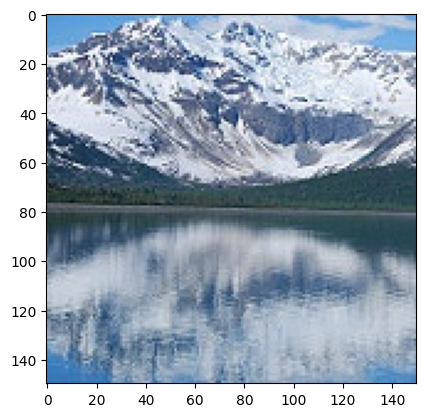

(1, 150, 150, 3)


In [97]:
IMAGE_SIZE = (150,150)
img_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20253.jpg'
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

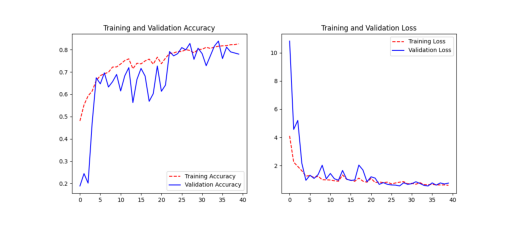

In [ ]:
show_image(first_model_plt)

1/1 [==============================] - 0s 193ms/step
Predicted class is: 1
Predicted class is: forest
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 150, 150, 32)      0         
                                                                 
 batch_normalization

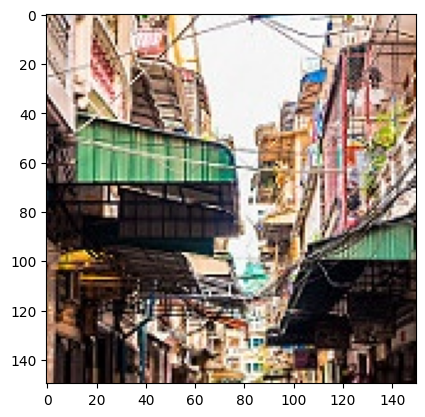

In [99]:
# predicting images first model
img = load_img(f'{predpath}/10082.jpg')
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = saved_first_model.predict_classes(images, batch_size=10)
predict_x = first_model_40.predict(images)[0]
classes_x = np.argmax(predict_x)

print("Predicted class is:", classes_x)
print("Predicted class is:", class_names[classes_x])
#print("Predicted class is:", class_names[classes_x[0]])

first_model_40.summary()

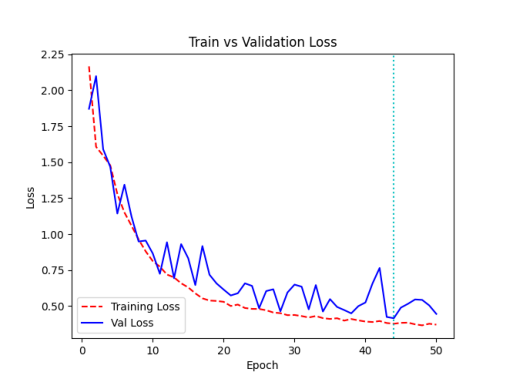

In [103]:
show_image(model_shuffle_50_plt)

1/1 [==============================] - 0s 204ms/step
Predicted class is: 0
Predicted class is: buildings
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 150, 150, 32)      0         
                                                                 
 batch_normalizat

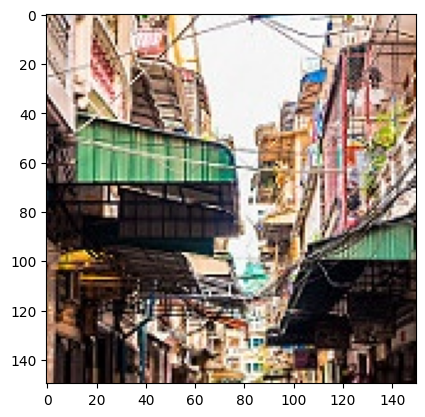

In [100]:
# predicting images model with 50 epochs using shuffle
img = load_img(f'{predpath}/10082.jpg')
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = saved_first_model.predict_classes(images, batch_size=10)
predict_x = model_50_shuffle.predict(images)[0]
classes_x = np.argmax(predict_x)

print("Predicted class is:", classes_x)
print("Predicted class is:", class_names[classes_x])
#print("Predicted class is:", class_names[classes_x[0]])
model_50_shuffle.summary()

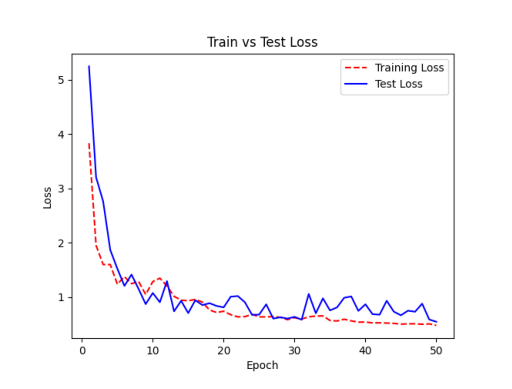

In [104]:
show_image(model_50_plt)

1/1 [==============================] - 0s 201ms/step
Predicted class is: 1
Predicted class is: forest
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 150, 150, 32)      0         
                                                                 
 batch_normalization

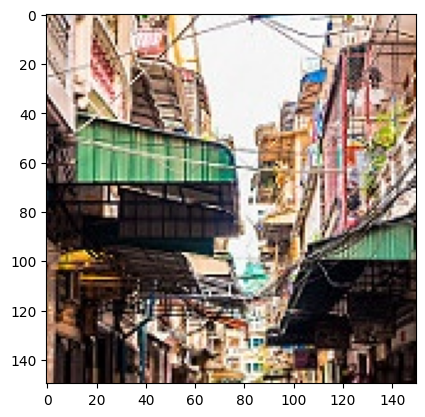

In [101]:
# predicting images model with 50 epochs
img = load_img(f'{predpath}/10082.jpg')
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = saved_first_model.predict_classes(images, batch_size=10)
predict_x = model_50.predict(images)[0]
classes_x = np.argmax(predict_x)

print("Predicted class is:", classes_x)
print("Predicted class is:", class_names[classes_x])
#print("Predicted class is:", class_names[classes_x[0]])
model_50.summary()

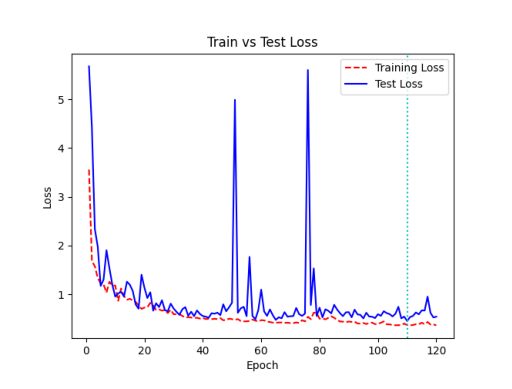

In [105]:
show_image(model_120_plt)

1/1 [==============================] - 0s 189ms/step
Predicted class is: 1
Predicted class is: forest
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 150, 150, 32)      0         
                                                                 
 batch_normalization

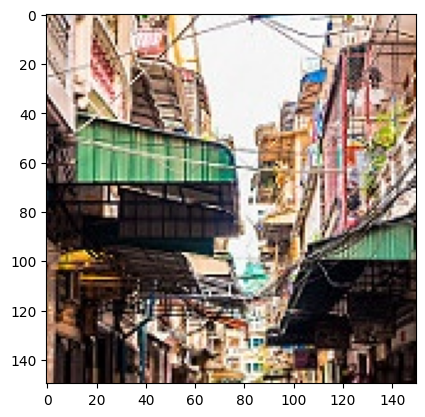

In [102]:
# predicting images model with 120 epochs
img = load_img(f'{predpath}/10082.jpg')
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = saved_first_model.predict_classes(images, batch_size=10)
predict_x = model_120.predict(images)[0]
classes_x = np.argmax(predict_x)

print("Predicted class is:", classes_x)
print("Predicted class is:", class_names[classes_x])
#print("Predicted class is:", class_names[classes_x[0]])
model_120.summary()